In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 18,
    'figure.figsize': [10, 6],
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'patch.linewidth': 0.5,
    'patch.facecolor': '348ABD',
    'patch.edgecolor': 'EEEEEE',
    'patch.antialiased': True,
    'text.color': '333333'
})
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease/updated_dataset.csv
/kaggle/input/parkinsons-disease/dataset.csv


![image](https://github.com/aysh34/Parkinsons-Disease-Detection/raw/main/assets/parkinsons-disease.png)

## Dataset Overview
Voice analysis dataset for Parkinson's disease detection using acoustic features.

## Key Variables

### Target Variable
- **status**: Diagnosis indicator (1 = Parkinson's disease, 0 = Healthy control)

### Primary Voice Features

#### Fundamental Frequency (Pitch)
- **MDVP:Fo(Hz)**: Average fundamental frequency in Hertz
- **MDVP:Fhi(Hz)**: Maximum fundamental frequency in Hertz
- **MDVP:Flo(Hz)**: Minimum fundamental frequency in Hertz

#### Pitch Variation (Jitter Measures)
- **MDVP:Jitter(%)**: Percentage measure of pitch instability
- **MDVP:Jitter(Abs)**: Absolute measure of pitch instability
- **MDVP:RAP**: Relative average perturbation
- **MDVP:PPQ**: Pitch period perturbation quotient
- **Jitter:DDP**: Average of pitch differences between cycles

#### Amplitude Variation (Shimmer Measures)
- **MDVP:Shimmer**: Measure of amplitude variation in voice
- **MDVP:Shimmer(dB)**: Amplitude variation in decibels
- **Shimmer:APQ3**: Average amplitude perturbation over 3 periods
- **Shimmer:APQ5**: Average amplitude perturbation over 5 periods
- **MDVP:APQ**: Amplitude perturbation quotient across sample
- **Shimmer:DDA**: Average absolute difference between amplitudes

#### Voice Quality Metrics
- **NHR**: Noise-to-harmonics ratio (measures breathiness/noise)
- **HNR**: Harmonics-to-noise ratio (reflects voice clarity)

#### Signal Complexity Features
- **RPDE**: Recurrence period density entropy (signal complexity)
- **DFA**: Detrended fluctuation analysis (signal self-similarity)
- **spread1**: Spectral spread measure (voice quality)
- **spread2**: Additional spectral spread measure
- **D2**: Fractal dimension of signal structure
- **PPE**: Pitch period entropy (pitch variation complexity)

In [2]:
df1 = pd.read_csv("/kaggle/input/parkinsons-disease/updated_dataset.csv")

In [3]:
df1.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Basic information about our dataset

print("=== BASIC DATASET INFORMATION ===")

print(f"Dataset shape: {df1.shape}")

print(f"\n===== Column names =====\n{df1.columns.tolist()}")

print(f"\n====== Data types =====\n{df1.dtypes} ")

print(f"\n===== Missing values =====\n{df1.isnull().sum()}")

print(f"\n===== Missing percentage =====\n{(df1.isnull().sum()/len(df1))*100}")

print(f"\n===== Duplicate rows =====\n{df1.duplicated().sum()}")

print(f"\n===== Data Statistics =====\n{df1.describe().T}")



=== BASIC DATASET INFORMATION ===
Dataset shape: (1000, 24)

===== Column names =====
['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

====== Data types =====
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64


In [5]:
df2 = df1.copy()
df2.drop('name',axis=1,inplace=True)

In [6]:
df2.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Distribution of target Variable

In [7]:
df2['status'].value_counts(normalize=True) * 100

status
1    54.1
0    45.9
Name: proportion, dtype: float64

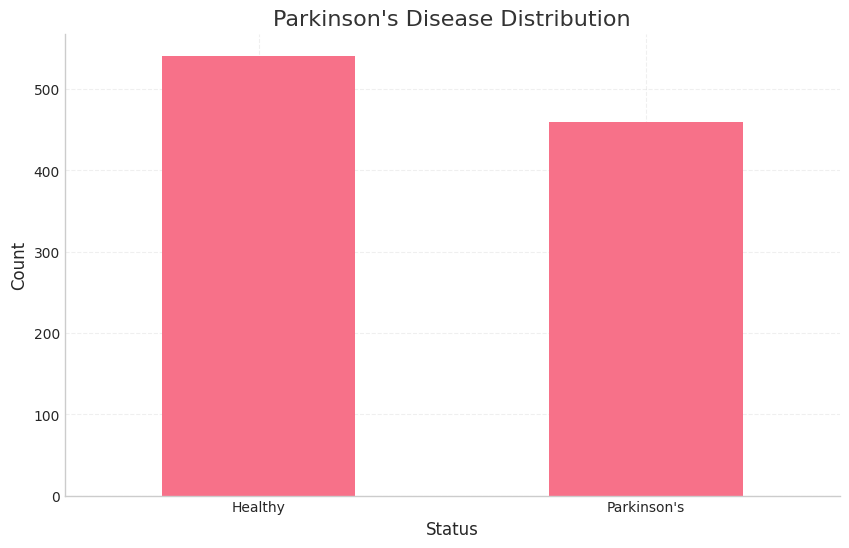

In [8]:
df2['status'].value_counts().plot(kind='bar')
plt.title('Parkinson\'s Disease Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks([0,1], ['Healthy', 'Parkinson\'s'], rotation=0)
plt.show()

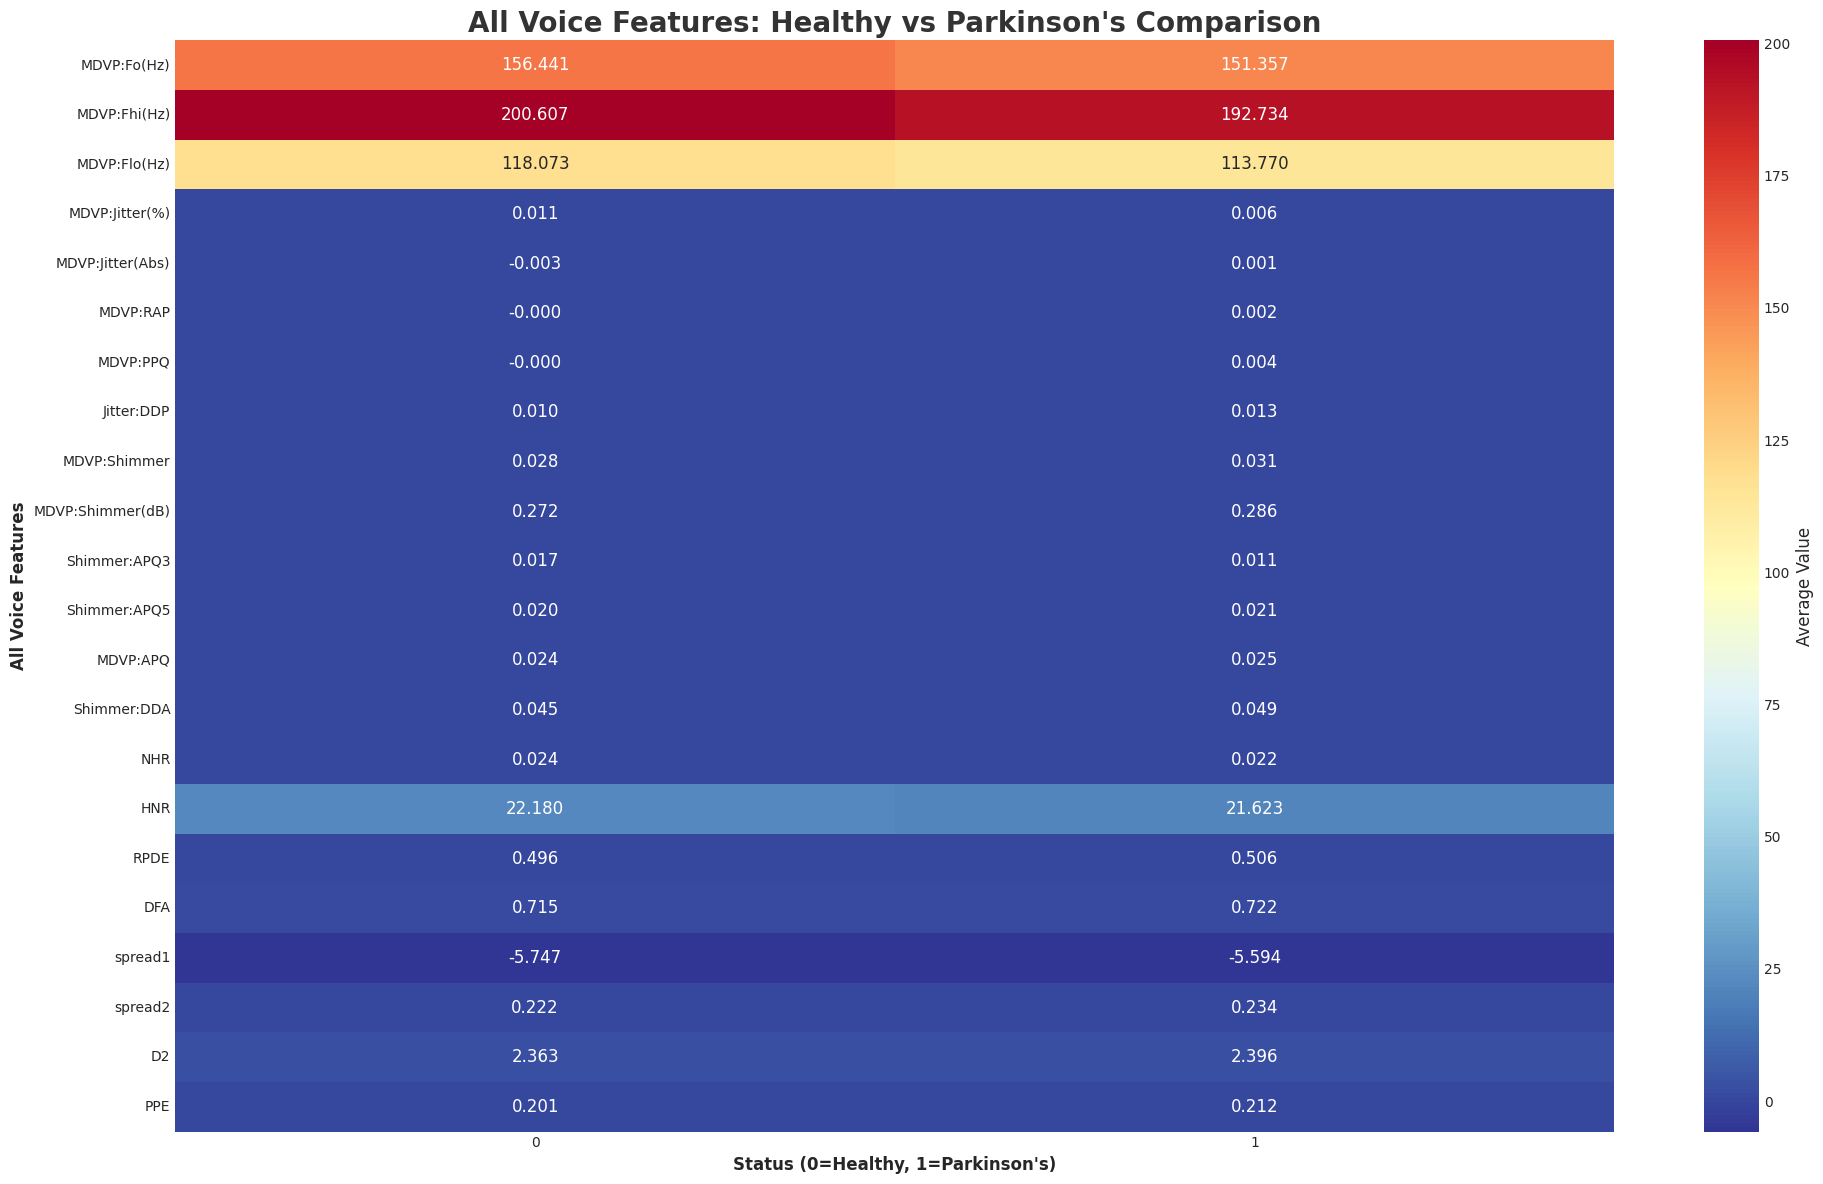

In [9]:
grouped_means = df2.groupby('status').mean()

plt.figure(figsize=(20, 12))  
sns.heatmap(grouped_means.T, annot=True, fmt='.3f', cmap='RdYlBu_r', 
            cbar_kws={'label': 'Average Value'})
plt.title('All Voice Features: Healthy vs Parkinson\'s Comparison', 
          fontweight='bold', fontsize=20)
plt.xlabel('Status (0=Healthy, 1=Parkinson\'s)', fontweight='bold')
plt.ylabel('All Voice Features', fontweight='bold')
plt.tight_layout()
plt.show()

### From the above visualization, in patients with Parkinson's:

The pitch is slightly low, the clarity is somewhat low, and the other differences are very minor.

Surprise: Voice shakiness (jitter) is higher in healthy people - this was not expected! If the dataset contains early-stage Parkinson's patients, they might not have developed severe symptoms yet.

> Jitter is the measurement of rapid, cycle-to-cycle variations in the fundamental frequency of a voice. Increased jitter is a significant voice feature associated with Parkinson's disease.
